# Fannie Mae - Defaulter Prediction

An analytical model to predict if a mortgage borrower will default on the loan payment and identify significant attributes which influence this decision.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## DATA EXPLORATION & PREPARATION

In [2]:
mbs=pd.read_csv("C:\\Users\\Prabha\\Downloads\\FannieMae\\consoldata_1234.csv", sep='\t', index_col=0)

In [3]:
mbs.shape

(1808802, 27)

In [4]:
pd.set_option('display.max_columns', None)  

In [5]:
mbs.head()

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),NUMBER OF BORROWERS,ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,CURRENT DQ STATUS,DEFAULT STATUS
0,100010724683,C,PMTT4,4.250,220000,360,07/2017,09/2017,80,80,1,32.0,735.0,N,C,SF,1,P,MD,212,NaN,FRM,NaN,NaN,N,0,0
1,100015036345,R,OTHER,3.990,118000,360,07/2017,09/2017,95,95,1,36.0,763.0,N,P,SF,1,P,MI,490,30.0,FRM,NaN,1.0,N,0,0
2,100015872947,C,OTHER,4.375,215000,360,07/2017,09/2017,76,76,2,32.0,761.0,N,P,PU,1,P,GA,305,NaN,FRM,780.0,NaN,N,0,0
3,100016305460,C,OTHER,3.875,194000,240,08/2017,10/2017,80,80,1,28.0,761.0,N,R,SF,1,P,IN,463,NaN,FRM,NaN,NaN,N,0,0
4,100017827362,R,OTHER,4.625,110000,360,08/2017,09/2017,80,80,1,32.0,771.0,N,C,SF,1,P,TX,752,NaN,FRM,NaN,NaN,N,0,0


In [6]:
mbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808802 entries, 0 to 1808801
Data columns (total 27 columns):
LOAN IDENTIFIER                            int64
ORIGINATION CHANNEL                        object
SELLER NAME                                object
ORIGINAL INTEREST RATE                     float64
ORIGINAL UPB                               int64
ORIGINAL LOAN TERM                         int64
ORIGINATION DATE                           object
FIRST PAYMENT DATE                         object
ORIGINAL LOAN-TO-VALUE (LTV)               int64
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)     int64
NUMBER OF BORROWERS                        int64
ORIGINAL DEBT TO INCOME RATIO              float64
BORROWER CREDIT SCORE AT ORIGINATION       float64
FIRST TIME HOME BUYER INDICATOR            object
LOAN PURPOSE                               object
PROPERTY TYPE                              object
NUMBER OF UNITS                            int64
OCCUPANCY TYPE                           

In [7]:
mbs.isnull().sum()

LOAN IDENTIFIER                                  0
ORIGINATION CHANNEL                              0
SELLER NAME                                      0
ORIGINAL INTEREST RATE                           0
ORIGINAL UPB                                     0
ORIGINAL LOAN TERM                               0
ORIGINATION DATE                                 0
FIRST PAYMENT DATE                               0
ORIGINAL LOAN-TO-VALUE (LTV)                     0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)           0
NUMBER OF BORROWERS                              0
ORIGINAL DEBT TO INCOME RATIO                  289
BORROWER CREDIT SCORE AT ORIGINATION          1429
FIRST TIME HOME BUYER INDICATOR                  0
LOAN PURPOSE                                     0
PROPERTY TYPE                                    0
NUMBER OF UNITS                                  0
OCCUPANCY TYPE                                   0
PROPERTY STATE                                   0
ZIP CODE SHORT                 

In [8]:
# To check if default status is '1' for the null values in ORIGINAL DEBT TO INCOME RATIO or BORROWER CREDIT SCORE AT ORIGINATION
mbs[ ((pd.isnull(mbs['ORIGINAL DEBT TO INCOME RATIO'])) | (pd.isnull(mbs['BORROWER CREDIT SCORE AT ORIGINATION']))) & 
        (mbs['DEFAULT STATUS']==1)]

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),NUMBER OF BORROWERS,ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,CURRENT DQ STATUS,DEFAULT STATUS
325648,703497611936,C,PMTT4,5.000,207000,360,07/2017,09/2017,90,90,1,33.0,NaN,Y,P,SF,1,P,WA,984,25.0,FRM,NaN,1.0,N,6,1
406352,852914595018,R,"WELLS FARGO BANK, N.A.",4.750,95000,360,07/2017,09/2017,80,80,2,31.0,NaN,Y,P,SF,1,P,FL,346,NaN,FRM,637.0,NaN,N,3,1
769739,638188768225,C,OTHER,5.000,165000,360,09/2017,11/2017,80,80,2,41.0,NaN,N,P,SF,1,P,FL,327,NaN,FRM,624.0,NaN,N,5,1
1142631,492371849714,R,OTHER,5.000,292000,360,04/2017,06/2017,75,75,1,NaN,692.0,N,P,SF,1,I,NY,104,NaN,FRM,NaN,NaN,N,4,1
1152125,513041714103,R,OTHER,4.125,259000,360,04/2017,06/2017,50,50,1,39.0,NaN,Y,P,PU,1,P,CO,801,NaN,FRM,NaN,NaN,N,9,1
1293405,816477677215,C,OTHER,4.750,190000,360,05/2017,07/2017,68,68,1,40.0,NaN,Y,P,SF,1,P,MI,480,NaN,FRM,NaN,NaN,N,8,1


####  As only 6 rows have default status as '1'  we will delete all the rows where in ORIGINAL DEBT TO INCOME RATIO or BORROWER CREDIT SCORE AT ORIGINATION is null.

In [9]:
mbs1=mbs[mbs['BORROWER CREDIT SCORE AT ORIGINATION'].notnull()]

In [10]:
mbs2=mbs1[mbs1['ORIGINAL DEBT TO INCOME RATIO'].notnull()]

In [11]:
mbs2.isnull().sum()

LOAN IDENTIFIER                                  0
ORIGINATION CHANNEL                              0
SELLER NAME                                      0
ORIGINAL INTEREST RATE                           0
ORIGINAL UPB                                     0
ORIGINAL LOAN TERM                               0
ORIGINATION DATE                                 0
FIRST PAYMENT DATE                               0
ORIGINAL LOAN-TO-VALUE (LTV)                     0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)           0
NUMBER OF BORROWERS                              0
ORIGINAL DEBT TO INCOME RATIO                    0
BORROWER CREDIT SCORE AT ORIGINATION             0
FIRST TIME HOME BUYER INDICATOR                  0
LOAN PURPOSE                                     0
PROPERTY TYPE                                    0
NUMBER OF UNITS                                  0
OCCUPANCY TYPE                                   0
PROPERTY STATE                                   0
ZIP CODE SHORT                 

#### Delete:
#### 1. Uneccessary colums like and LOAN IDENTIFIER', 'ZIP CODE'.
#### 2. Columns which have more than 50% null values like  'PRIMARY MORTGAGE INSURANCE PERCENT', 'CO-BORROWER CREDIT SCORE AT ORIGINATION', 'MORTGAGE INSURANCE TYPE'.
#### 3. Columns 'ORIGINATION DATE','FIRST PAYMENT DATE'which have year in 99.99 percent of the records as 2017 hence no variance.

In [12]:
mbs3=mbs2.drop(['LOAN IDENTIFIER','ORIGINATION DATE','FIRST PAYMENT DATE','PRIMARY MORTGAGE INSURANCE PERCENT',
                'CO-BORROWER CREDIT SCORE AT ORIGINATION', 'MORTGAGE INSURANCE TYPE', 'CURRENT DQ STATUS',
                'ZIP CODE SHORT'], axis=1)

In [13]:
mbs3.isnull().sum()

ORIGINATION CHANNEL                       0
SELLER NAME                               0
ORIGINAL INTEREST RATE                    0
ORIGINAL UPB                              0
ORIGINAL LOAN TERM                        0
ORIGINAL LOAN-TO-VALUE (LTV)              0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    0
NUMBER OF BORROWERS                       0
ORIGINAL DEBT TO INCOME RATIO             0
BORROWER CREDIT SCORE AT ORIGINATION      0
FIRST TIME HOME BUYER INDICATOR           0
LOAN PURPOSE                              0
PROPERTY TYPE                             0
NUMBER OF UNITS                           0
OCCUPANCY TYPE                            0
PROPERTY STATE                            0
PRODUCT TYPE                              0
RELOCATION MORTGAGE INDICATOR             0
DEFAULT STATUS                            0
dtype: int64

In [14]:
mbs3.head()

,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),NUMBER OF BORROWERS,ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,PRODUCT TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT STATUS
0,C,PMTT4,4.250,220000,360,80,80,1,32.0,735.0,N,C,SF,1,P,MD,FRM,N,0
1,R,OTHER,3.990,118000,360,95,95,1,36.0,763.0,N,P,SF,1,P,MI,FRM,N,0
2,C,OTHER,4.375,215000,360,76,76,2,32.0,761.0,N,P,PU,1,P,GA,FRM,N,0
3,C,OTHER,3.875,194000,240,80,80,1,28.0,761.0,N,R,SF,1,P,IN,FRM,N,0
4,R,OTHER,4.625,110000,360,80,80,1,32.0,771.0,N,C,SF,1,P,TX,FRM,N,0


In [15]:
mbs3.shape

(1807092, 19)

# EXPLORATION OF DATA

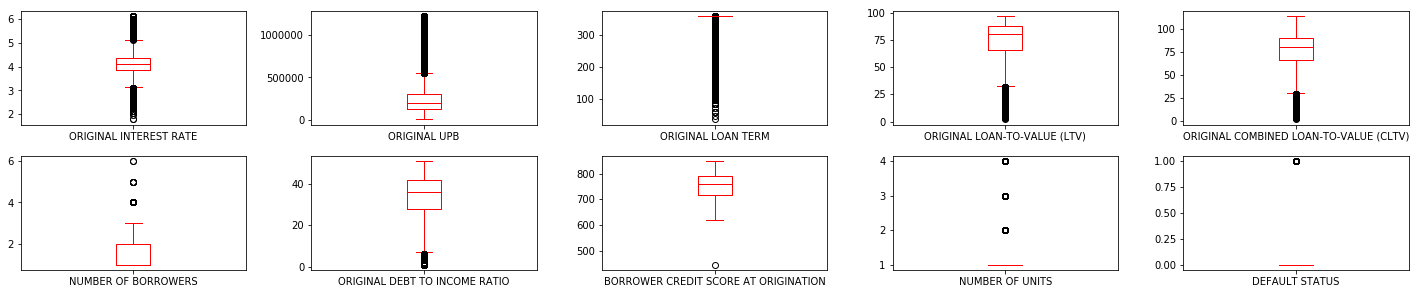

In [16]:
# To check for outliers
mbs3.plot(kind='box',color='Red',subplots=True,layout=(5,5),sharex=False,figsize=(20,10))
mpl.tight_layout()
mpl.show()

In [17]:
mbs3.describe()

,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),NUMBER OF BORROWERS,ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,NUMBER OF UNITS,DEFAULT STATUS
count,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06,1.807092e+06
mean,4.119605e+00,2.264296e+05,3.197559e+02,7.449280e+01,7.501685e+01,1.482993e+00,3.451322e+01,7.502840e+02,1.030270e+00,4.691515e-03
std,4.949356e-01,1.184483e+05,7.383471e+01,1.727029e+01,1.738825e+01,5.217714e-01,9.152231e+00,4.729445e+01,2.321686e-01,6.833380e-02
min,1.790000e+00,8.000000e+03,3.600000e+01,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.450000e+02,1.000000e+00,0.000000e+00
25%,3.875000e+00,1.350000e+05,3.600000e+02,6.600000e+01,6.600000e+01,1.000000e+00,2.800000e+01,7.170000e+02,1.000000e+00,0.000000e+00
50%,4.125000e+00,2.040000e+05,3.600000e+02,8.000000e+01,8.000000e+01,1.000000e+00,3.600000e+01,7.600000e+02,1.000000e+00,0.000000e+00
75%,4.375000e+00,3.000000e+05,3.600000e+02,8.800000e+01,9.000000e+01,2.000000e+00,4.200000e+01,7.900000e+02,1.000000e+00,0.000000e+00
max,6.125000e+00,1.223000e+06,3.600000e+02,9.700000e+01,1.140000e+02,6.000000e+00,5.100000e+01,8.500000e+02,4.000000e+00,1.000000e+00


#### Though box plotting shows outliers in certain variables, all the values are within the permissable range and hence no outliertreatment is being done.

In [18]:
mbs3.columns

Index(['ORIGINATION CHANNEL', 'SELLER NAME', 'ORIGINAL INTEREST RATE',
       'ORIGINAL UPB', 'ORIGINAL LOAN TERM', 'ORIGINAL LOAN-TO-VALUE (LTV)',
       'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'NUMBER OF BORROWERS',
       'ORIGINAL DEBT TO INCOME RATIO', 'BORROWER CREDIT SCORE AT ORIGINATION',
       'FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE', 'PROPERTY TYPE',
       'NUMBER OF UNITS', 'OCCUPANCY TYPE', 'PROPERTY STATE', 'PRODUCT TYPE',
       'RELOCATION MORTGAGE INDICATOR', 'DEFAULT STATUS'],
      dtype='object')

## Exploring Data by Visualization

#### To check if any of the variables are correlated

In [19]:
temp=mbs3[['ORIGINAL INTEREST RATE', 'ORIGINAL UPB', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
       'ORIGINAL DEBT TO INCOME RATIO', 'BORROWER CREDIT SCORE AT ORIGINATION']]

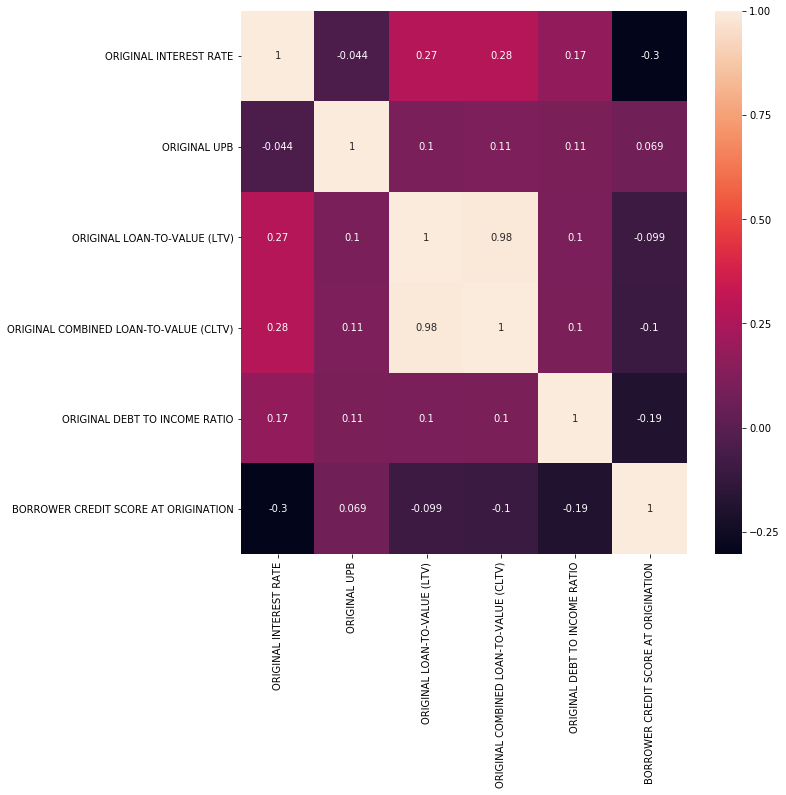

In [20]:
fig, ax = mpl.subplots(figsize=(10,10))
sns.heatmap(temp.corr(),annot=True,ax=ax,xticklabels=temp.columns, yticklabels=temp.columns)

#### As there is very strong correlation (0.98) between 'LOAN-TO-VALUE (LTV)''ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)' we will drop the variable  'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)'. 

In [21]:
mbs3=mbs3.drop(['ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)'], axis=1)

In [22]:
# Check the class distributions - '1: Defaulter', ' 0- Non Defaulter'
mbs3.groupby(['DEFAULT STATUS']).size()

DEFAULT STATUS
0    1798614
1       8478
dtype: int64

In [23]:
print (pd.DataFrame({'Percentage': mbs3.groupby('DEFAULT STATUS').size() / len(mbs3)}))

                Percentage
DEFAULT STATUS            
0                 0.995308
1                 0.004692


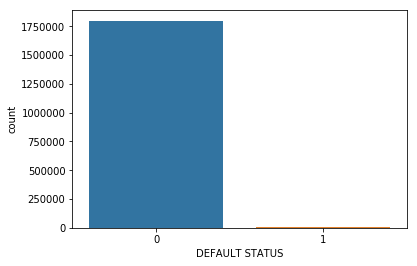

In [24]:
sns.countplot("DEFAULT STATUS",data=mbs3)

### This is an imbalanced data as the percentage of defaulters if only 0.47%. Hence we will be using the Undersampling and Oversampling techniques before running the ML models.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8B1F5278>,
      dtype=object)

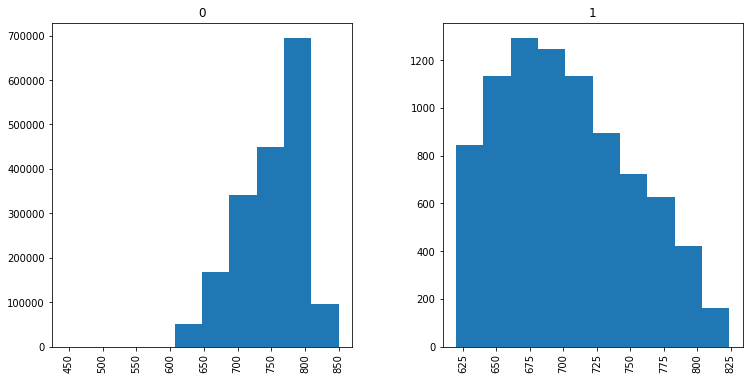

In [25]:
# BORROWER CREDIT SCORE AT ORIGINATION
mbs3['BORROWER CREDIT SCORE AT ORIGINATION'].hist(by=mbs3['DEFAULT STATUS'], figsize=(12,6))

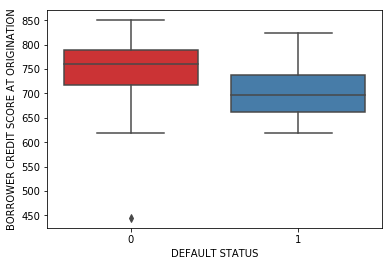

In [26]:
sns.boxplot(x="DEFAULT STATUS", y="BORROWER CREDIT SCORE AT ORIGINATION", data=mbs3, palette="Set1")

#### BORROWER CREDIT SCORE AT ORIGINATION seems to be significant predictor and inversley related. The averaged credit score of non defaulters is higher compared to defaulters.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8B71D860>,
      dtype=object)

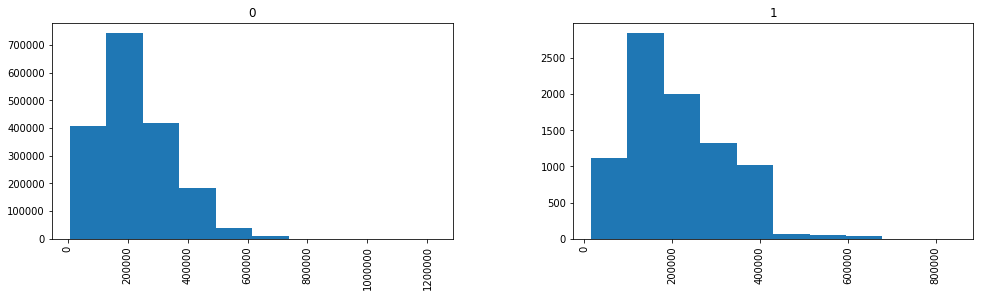

In [27]:
# ORIGINAL UPB
mbs3['ORIGINAL UPB'].hist(by=mbs3['DEFAULT STATUS'], figsize=(16,4))

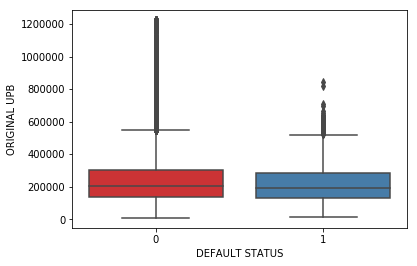

In [28]:
sns.boxplot(x="DEFAULT STATUS", y="ORIGINAL UPB", data=mbs3, palette="Set1")

#### ORIGINAL UPB seems to be significant predictor. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8A96A860>,
      dtype=object)

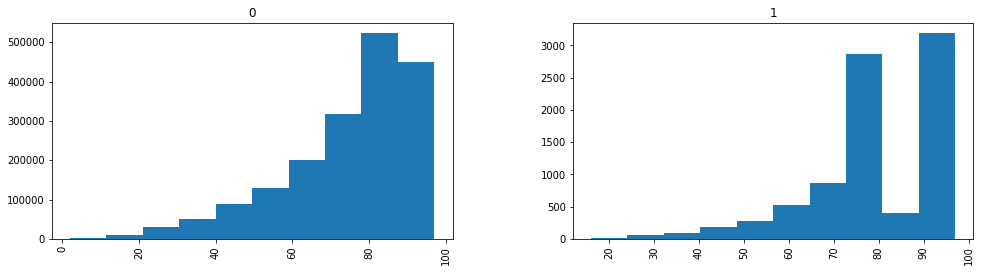

In [29]:
# ORIGINAL LOAN TO VALUE
mbs3['ORIGINAL LOAN-TO-VALUE (LTV)'].hist(by=mbs3['DEFAULT STATUS'], figsize=(16,4))

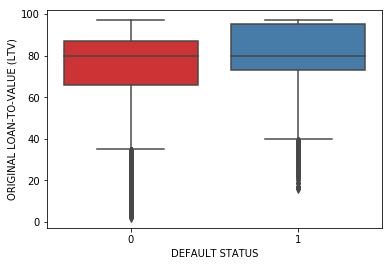

In [30]:
sns.boxplot(x="DEFAULT STATUS", y="ORIGINAL LOAN-TO-VALUE (LTV)", data=mbs3, palette="Set1")

#### ORIGINAL LOAN TO VALUE seems to be significant predictor. More defaulters seem to be in higher LTV ratio.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8B321A20>,
      dtype=object)

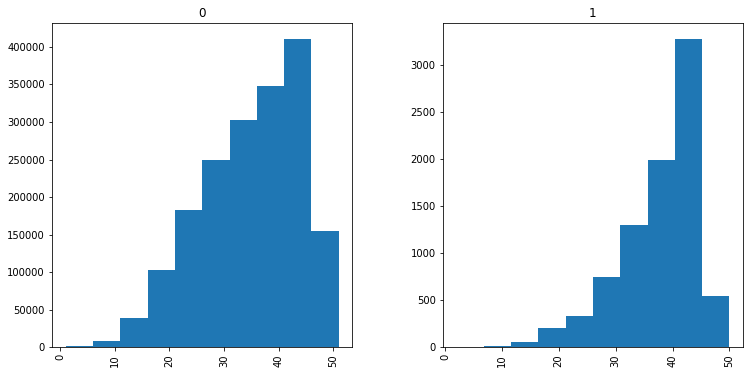

In [31]:
# DEBT TO INCOME RATIO
mbs3['ORIGINAL DEBT TO INCOME RATIO'].hist(by=mbs3['DEFAULT STATUS'], figsize=(12,6))

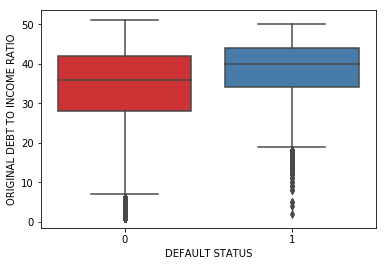

In [32]:
sns.boxplot(x="DEFAULT STATUS", y="ORIGINAL DEBT TO INCOME RATIO", data=mbs3, palette="Set1")

#### ORIGINAL DEBT TO INCOME RATIO seems to be significant predictor. More defaulters seem to be in higher ratios.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8A8EE588>,
      dtype=object)

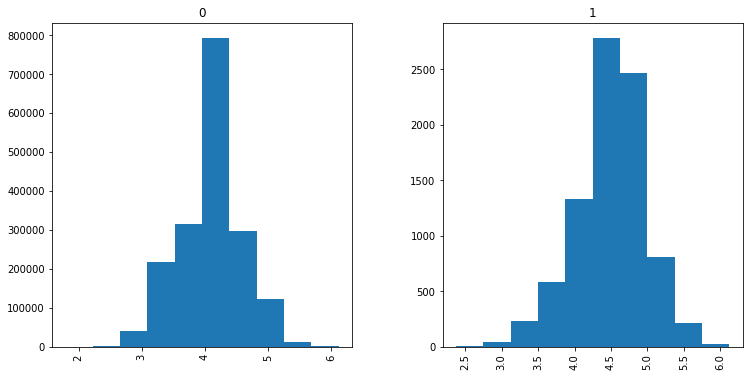

In [33]:
# ORIGINAL INTEREST RATE
mbs3['ORIGINAL INTEREST RATE'].hist(by=mbs3['DEFAULT STATUS'], figsize=(12,6))

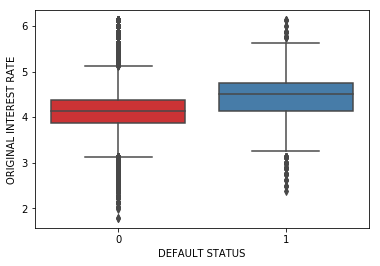

In [34]:
sns.boxplot(x="DEFAULT STATUS", y="ORIGINAL INTEREST RATE", data=mbs3, palette="Set1")

#### ORIGINAL INTEREST RATE seems to be significant predictor. More defaulters seem to be in higher interest rate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8A935DA0>,
      dtype=object)

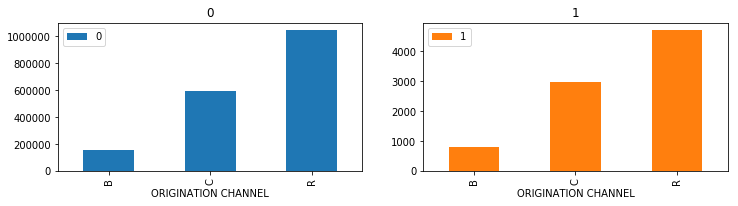

In [35]:
# ORIGINATION CHANNEL
ag=mbs3.groupby(['ORIGINATION CHANNEL', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(12,6))

#### ORIGINATION CHANNEL doesnt seem very significant.

In [36]:
mbs3.columns

Index(['ORIGINATION CHANNEL', 'SELLER NAME', 'ORIGINAL INTEREST RATE',
       'ORIGINAL UPB', 'ORIGINAL LOAN TERM', 'ORIGINAL LOAN-TO-VALUE (LTV)',
       'NUMBER OF BORROWERS', 'ORIGINAL DEBT TO INCOME RATIO',
       'BORROWER CREDIT SCORE AT ORIGINATION',
       'FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE', 'PROPERTY TYPE',
       'NUMBER OF UNITS', 'OCCUPANCY TYPE', 'PROPERTY STATE', 'PRODUCT TYPE',
       'RELOCATION MORTGAGE INDICATOR', 'DEFAULT STATUS'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8B489BE0>,
      dtype=object)

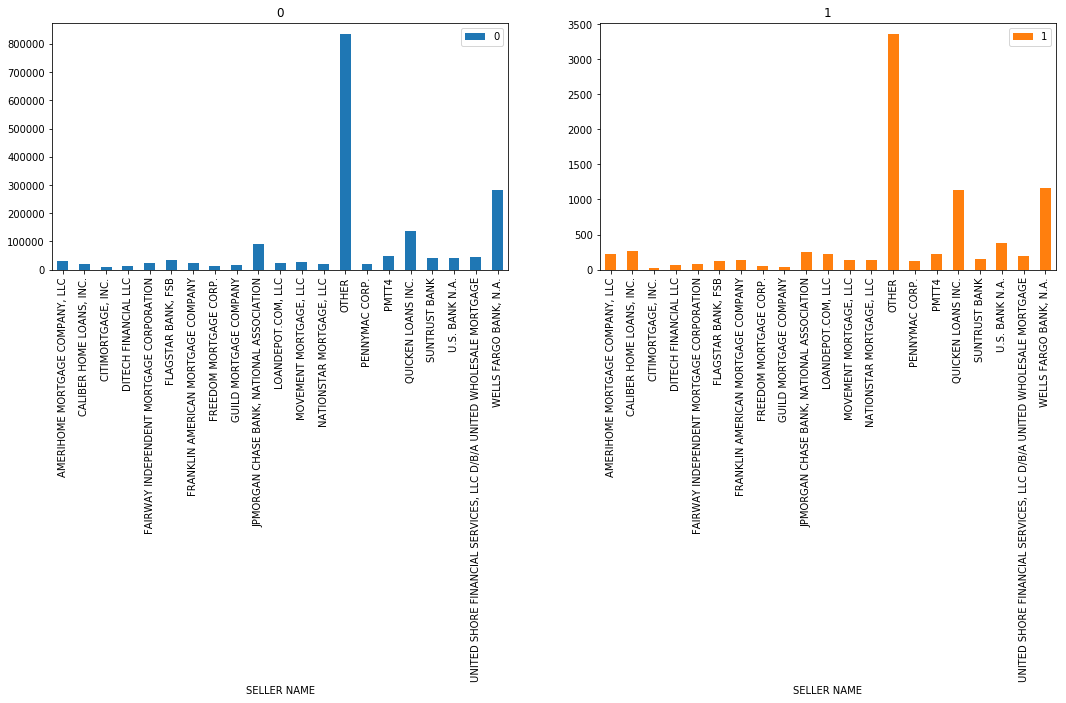

In [37]:
# SELLER NAME
ag=mbs3.groupby(['SELLER NAME', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(18,10))

#### SELLER NAME seem to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8BD2BB00>,
      dtype=object)

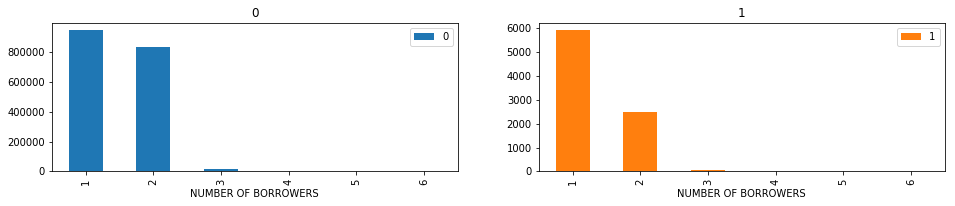

In [38]:
# NUMBER OF BORROWERS
ag=mbs3.groupby(['NUMBER OF BORROWERS', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### NO OF BORROWERS seem to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8C0C6940>,
      dtype=object)

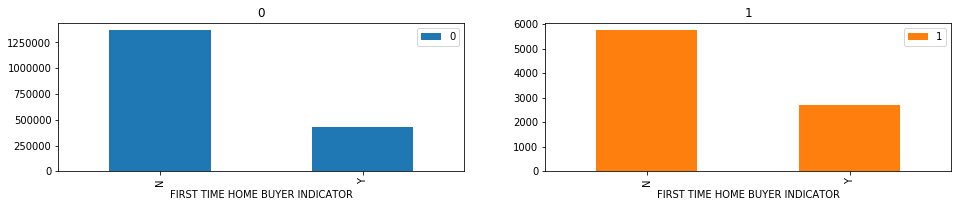

In [39]:
# FIRST TIME HOME BUYER INDICATOR
ag=mbs3.groupby(['FIRST TIME HOME BUYER INDICATOR', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### FIRST TIME HOME BUYER INDICATOR seem to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8BEBEB00>,
      dtype=object)

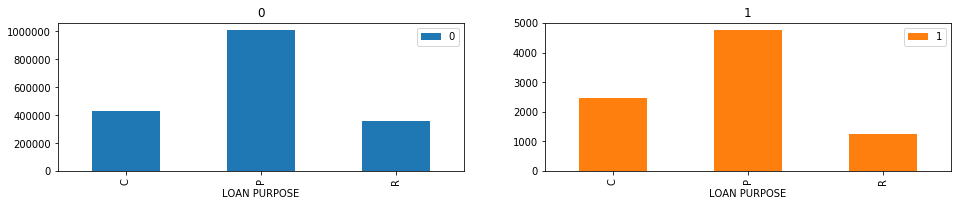

In [40]:
# LOAN PURPOSE
ag=mbs3.groupby(['LOAN PURPOSE', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8C156438>,
      dtype=object)

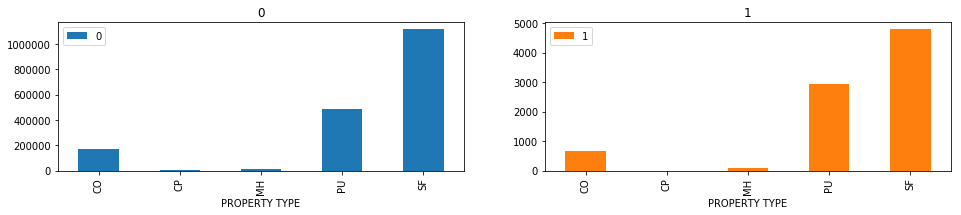

In [41]:
# PROPERTY TYPE
ag=mbs3.groupby(['PROPERTY TYPE', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### PROPERTY TYPE does not seem to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8C58F908>,
      dtype=object)

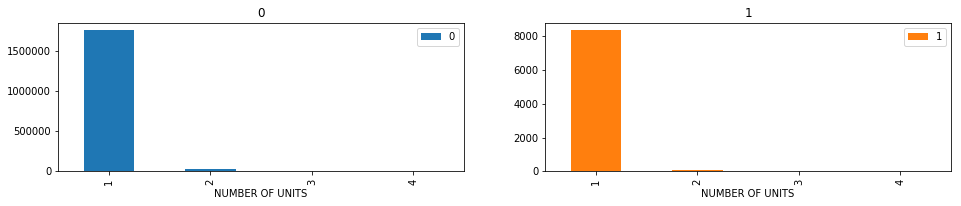

In [42]:
# NUMBER OF UNITS
ag=mbs3.groupby(['NUMBER OF UNITS', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### NUMBER OF UNITS does not seem to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8C79D668>,
      dtype=object)

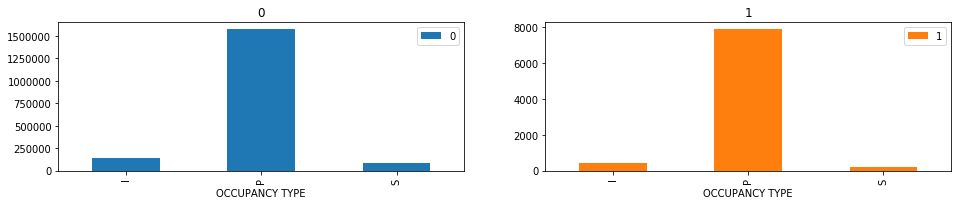

In [43]:
# OCCUPANCY TYPE
ag=mbs3.groupby(['OCCUPANCY TYPE', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### OCCUPANCY TYPE does not seem to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8C7F4160>],
      dtype=object)

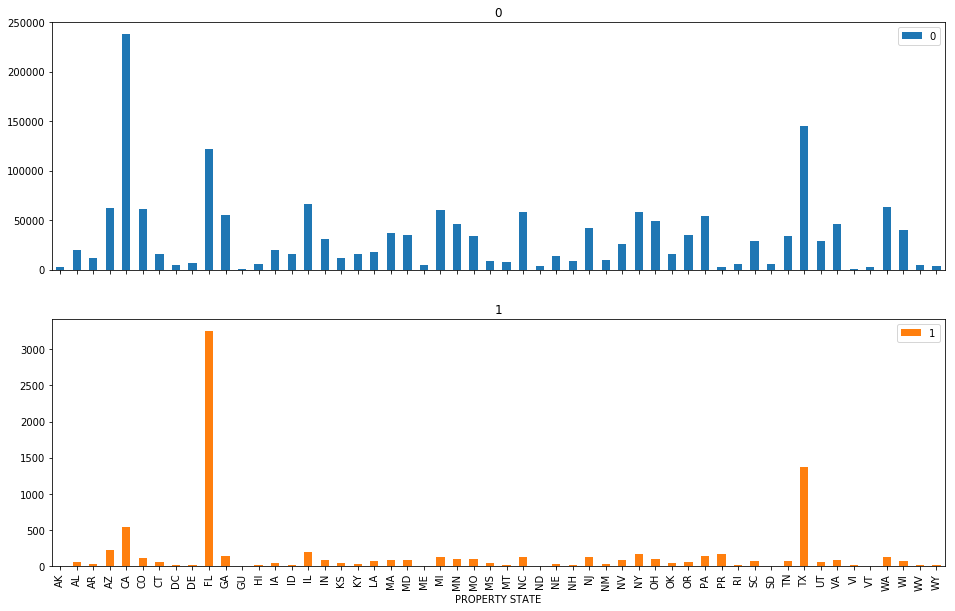

In [44]:
# PROPERTY STATE
ag=mbs3.groupby(['PROPERTY STATE', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,1),figsize=(16,10))

#### PROPERTY STATE seems to be significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8CE32D68>,
      dtype=object)

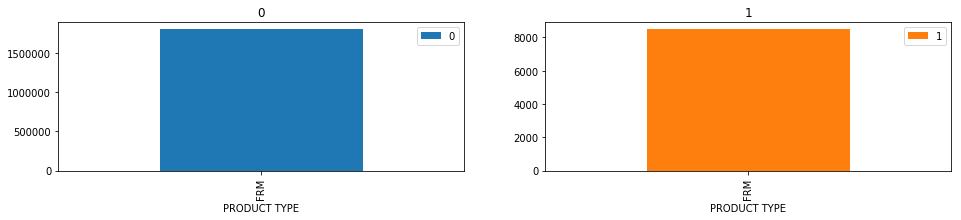

In [45]:
# PRODUCT TYPE
ag=mbs3.groupby(['PRODUCT TYPE', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### PRODUCT TYPE is not significant predictor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8C8BADA0>,
      dtype=object)

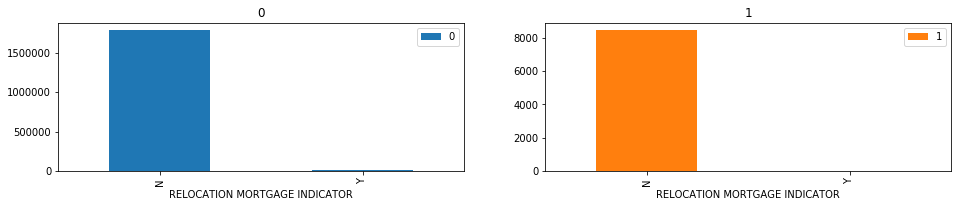

In [46]:
# RELOCATION MORTGAGE INDICATOR
ag=mbs3.groupby(['RELOCATION MORTGAGE INDICATOR', 'DEFAULT STATUS']).size()
ag.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(16,6))

#### RELOCATION MORTGAGE INDICATOR is not significant predictor.

In [47]:
# As RELOCATION MORTGAGE INDICATOR and PRODUCT TYPE have only single value categorical data we delete these coloumns
mbs3=mbs3.drop(['RELOCATION MORTGAGE INDICATOR', 'PRODUCT TYPE'], axis=1)

## FEATURE ENGINEERING

In [48]:
# Creating dummies for all the categorical variables
mbs_final = pd.get_dummies(mbs3,drop_first=True,columns=['ORIGINATION CHANNEL', 'SELLER NAME',
       'NUMBER OF BORROWERS','FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE', 'PROPERTY TYPE',
       'NUMBER OF UNITS', 'OCCUPANCY TYPE', 'PROPERTY STATE'])

In [49]:
mbs_final.head()

,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,DEFAULT STATUS,ORIGINATION CHANNEL_C,ORIGINATION CHANNEL_R,"SELLER NAME_CALIBER HOME LOANS, INC.","SELLER NAME_CITIMORTGAGE, INC.",SELLER NAME_DITECH FINANCIAL LLC,SELLER NAME_FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"SELLER NAME_FLAGSTAR BANK, FSB",SELLER NAME_FRANKLIN AMERICAN MORTGAGE COMPANY,SELLER NAME_FREEDOM MORTGAGE CORP.,SELLER NAME_GUILD MORTGAGE COMPANY,"SELLER NAME_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","SELLER NAME_LOANDEPOT.COM, LLC","SELLER NAME_MOVEMENT MORTGAGE, LLC","SELLER NAME_NATIONSTAR MORTGAGE, LLC",SELLER NAME_OTHER,SELLER NAME_PENNYMAC CORP.,SELLER NAME_PMTT4,SELLER NAME_QUICKEN LOANS INC.,SELLER NAME_SUNTRUST BANK,SELLER NAME_U.S. BANK N.A.,"SELLER NAME_UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","SELLER NAME_WELLS FARGO BANK, N.A.",NUMBER OF BORROWERS_2,NUMBER OF BORROWERS_3,NUMBER OF BORROWERS_4,NUMBER OF BORROWERS_5,NUMBER OF BORROWERS_6,FIRST TIME HOME BUYER INDICATOR_Y,LOAN PURPOSE_P,LOAN PURPOSE_R,PROPERTY TYPE_CP,PROPERTY TYPE_MH,PROPERTY TYPE_PU,PROPERTY TYPE_SF,NUMBER OF UNITS_2,NUMBER OF UNITS_3,NUMBER OF UNITS_4,OCCUPANCY TYPE_P,OCCUPANCY TYPE_S,PROPERTY STATE_AL,PROPERTY STATE_AR,PROPERTY STATE_AZ,PROPERTY STATE_CA,PROPERTY STATE_CO,PROPERTY STATE_CT,PROPERTY STATE_DC,PROPERTY STATE_DE,PROPERTY STATE_FL,PROPERTY STATE_GA,PROPERTY STATE_GU,PROPERTY STATE_HI,PROPERTY STATE_IA,PROPERTY STATE_ID,PROPERTY STATE_IL,PROPERTY STATE_IN,PROPERTY STATE_KS,PROPERTY STATE_KY,PROPERTY STATE_LA,PROPERTY STATE_MA,PROPERTY STATE_MD,PROPERTY STATE_ME,PROPERTY STATE_MI,PROPERTY STATE_MN,PROPERTY STATE_MO,PROPERTY STATE_MS,PROPERTY STATE_MT,PROPERTY STATE_NC,PROPERTY STATE_ND,PROPERTY STATE_NE,PROPERTY STATE_NH,PROPERTY STATE_NJ,PROPERTY STATE_NM,PROPERTY STATE_NV,PROPERTY STATE_NY,PROPERTY STATE_OH,PROPERTY STATE_OK,PROPERTY STATE_OR,PROPERTY STATE_PA,PROPERTY STATE_PR,PROPERTY STATE_RI,PROPERTY STATE_SC,PROPERTY STATE_SD,PROPERTY STATE_TN,PROPERTY STATE_TX,PROPERTY STATE_UT,PROPERTY STATE_VA,PROPERTY STATE_VI,PROPERTY STATE_VT,PROPERTY STATE_WA,PROPERTY STATE_WI,PROPERTY STATE_WV,PROPERTY STATE_WY
0,4.250,220000,360,80,32.0,735.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.990,118000,360,95,36.0,763.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.375,215000,360,76,32.0,761.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.875,194000,240,80,28.0,761.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.625,110000,360,80,32.0,771.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [50]:
mbs_final.shape

(1807092, 99)

In [51]:
# Standardizing all the continuous variables
from sklearn.preprocessing import StandardScaler

In [52]:
mbs_toscale=mbs_final[['ORIGINAL INTEREST RATE', 'ORIGINAL UPB', 'ORIGINAL LOAN TERM',
       'ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO', 'BORROWER CREDIT SCORE AT ORIGINATION']]       

In [53]:
std_scale = StandardScaler().fit(mbs_toscale)

In [54]:
mbs_scaled = std_scale.transform(mbs_toscale)

In [55]:
mbs_scaled[:5,]

array([[ 0.26345795, -0.05428173,  0.54505628,  0.31888296, -0.27460199,
        -0.32316785],
       [-0.26186311, -0.91541725,  0.54505628,  1.18742702,  0.16245004,
         0.26886796],
       [ 0.51601615, -0.09649425,  0.54505628,  0.08727121, -0.27460199,
         0.22657969],
       [-0.49421666, -0.27378686, -1.080196  ,  0.31888296, -0.71165402,
         0.22657969],
       [ 1.02113255, -0.98295729,  0.54505628,  0.31888296, -0.27460199,
         0.43802105]])

In [56]:
mbs_scaled_df = pd.DataFrame(mbs_scaled, index=mbs_toscale.index, columns=mbs_toscale.columns)

In [57]:
mbs_scaled_df.head()

,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION
0,0.263458,-0.054282,0.545056,0.318883,-0.274602,-0.323168
1,-0.261863,-0.915417,0.545056,1.187427,0.162450,0.268868
2,0.516016,-0.096494,0.545056,0.087271,-0.274602,0.226580
3,-0.494217,-0.273787,-1.080196,0.318883,-0.711654,0.226580
4,1.021133,-0.982957,0.545056,0.318883,-0.274602,0.438021


In [58]:
mbs_scaled_final= pd.concat([mbs_scaled_df,mbs_final.drop(['ORIGINAL INTEREST RATE', 'ORIGINAL UPB', 'ORIGINAL LOAN TERM',
       'ORIGINAL LOAN-TO-VALUE (LTV)', 
       'ORIGINAL DEBT TO INCOME RATIO', 'BORROWER CREDIT SCORE AT ORIGINATION'], axis=1)], axis=1, sort=False)


In [59]:
mbs_scaled_final.head()

,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,DEFAULT STATUS,ORIGINATION CHANNEL_C,ORIGINATION CHANNEL_R,"SELLER NAME_CALIBER HOME LOANS, INC.","SELLER NAME_CITIMORTGAGE, INC.",SELLER NAME_DITECH FINANCIAL LLC,SELLER NAME_FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"SELLER NAME_FLAGSTAR BANK, FSB",SELLER NAME_FRANKLIN AMERICAN MORTGAGE COMPANY,SELLER NAME_FREEDOM MORTGAGE CORP.,SELLER NAME_GUILD MORTGAGE COMPANY,"SELLER NAME_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","SELLER NAME_LOANDEPOT.COM, LLC","SELLER NAME_MOVEMENT MORTGAGE, LLC","SELLER NAME_NATIONSTAR MORTGAGE, LLC",SELLER NAME_OTHER,SELLER NAME_PENNYMAC CORP.,SELLER NAME_PMTT4,SELLER NAME_QUICKEN LOANS INC.,SELLER NAME_SUNTRUST BANK,SELLER NAME_U.S. BANK N.A.,"SELLER NAME_UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","SELLER NAME_WELLS FARGO BANK, N.A.",NUMBER OF BORROWERS_2,NUMBER OF BORROWERS_3,NUMBER OF BORROWERS_4,NUMBER OF BORROWERS_5,NUMBER OF BORROWERS_6,FIRST TIME HOME BUYER INDICATOR_Y,LOAN PURPOSE_P,LOAN PURPOSE_R,PROPERTY TYPE_CP,PROPERTY TYPE_MH,PROPERTY TYPE_PU,PROPERTY TYPE_SF,NUMBER OF UNITS_2,NUMBER OF UNITS_3,NUMBER OF UNITS_4,OCCUPANCY TYPE_P,OCCUPANCY TYPE_S,PROPERTY STATE_AL,PROPERTY STATE_AR,PROPERTY STATE_AZ,PROPERTY STATE_CA,PROPERTY STATE_CO,PROPERTY STATE_CT,PROPERTY STATE_DC,PROPERTY STATE_DE,PROPERTY STATE_FL,PROPERTY STATE_GA,PROPERTY STATE_GU,PROPERTY STATE_HI,PROPERTY STATE_IA,PROPERTY STATE_ID,PROPERTY STATE_IL,PROPERTY STATE_IN,PROPERTY STATE_KS,PROPERTY STATE_KY,PROPERTY STATE_LA,PROPERTY STATE_MA,PROPERTY STATE_MD,PROPERTY STATE_ME,PROPERTY STATE_MI,PROPERTY STATE_MN,PROPERTY STATE_MO,PROPERTY STATE_MS,PROPERTY STATE_MT,PROPERTY STATE_NC,PROPERTY STATE_ND,PROPERTY STATE_NE,PROPERTY STATE_NH,PROPERTY STATE_NJ,PROPERTY STATE_NM,PROPERTY STATE_NV,PROPERTY STATE_NY,PROPERTY STATE_OH,PROPERTY STATE_OK,PROPERTY STATE_OR,PROPERTY STATE_PA,PROPERTY STATE_PR,PROPERTY STATE_RI,PROPERTY STATE_SC,PROPERTY STATE_SD,PROPERTY STATE_TN,PROPERTY STATE_TX,PROPERTY STATE_UT,PROPERTY STATE_VA,PROPERTY STATE_VI,PROPERTY STATE_VT,PROPERTY STATE_WA,PROPERTY STATE_WI,PROPERTY STATE_WV,PROPERTY STATE_WY
0,0.263458,-0.054282,0.545056,0.318883,-0.274602,-0.323168,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.261863,-0.915417,0.545056,1.187427,0.162450,0.268868,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.516016,-0.096494,0.545056,0.087271,-0.274602,0.226580,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.494217,-0.273787,-1.080196,0.318883,-0.711654,0.226580,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.021133,-0.982957,0.545056,0.318883,-0.274602,0.438021,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [60]:
mbs_scaled_final.shape

(1807092, 99)

## USING VARIOUS SAMPLING METHODS FOR BALANCING THE DATA AND BUILD THE MODELS FOR PREDICTION

## UNDERSAMPLING

In [61]:
# for undersampling we need a portion of majority class and will take whole data of minority class

Default_indices= np.array(mbs_scaled_final[mbs_scaled_final['DEFAULT STATUS']==1].index)
normal_indices = np.array(mbs_scaled_final[mbs_scaled_final['DEFAULT STATUS']==0].index)

Normal_indices_undersample = np.array(np.random.choice(normal_indices, len(Default_indices),replace=False))
undersample_data= np.concatenate([Default_indices,Normal_indices_undersample])

In [62]:
undersample_data = mbs_scaled_final.loc[undersample_data]

In [63]:
undersample_data .groupby(['DEFAULT STATUS']).size()

DEFAULT STATUS
0    8478
1    8478
dtype: int64

### Various proportion of data wrt Default status ('1') were tried however 50% default status yeilded best prediction result. 

## TEST TRAIN SPLIT

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(undersample_data.drop("DEFAULT STATUS", axis=1),
                                                    undersample_data[["DEFAULT STATUS"]], test_size = 0.3,\
                                                    random_state=111)

In [65]:
X_train.head()

,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,ORIGINATION CHANNEL_C,ORIGINATION CHANNEL_R,"SELLER NAME_CALIBER HOME LOANS, INC.","SELLER NAME_CITIMORTGAGE, INC.",SELLER NAME_DITECH FINANCIAL LLC,SELLER NAME_FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"SELLER NAME_FLAGSTAR BANK, FSB",SELLER NAME_FRANKLIN AMERICAN MORTGAGE COMPANY,SELLER NAME_FREEDOM MORTGAGE CORP.,SELLER NAME_GUILD MORTGAGE COMPANY,"SELLER NAME_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","SELLER NAME_LOANDEPOT.COM, LLC","SELLER NAME_MOVEMENT MORTGAGE, LLC","SELLER NAME_NATIONSTAR MORTGAGE, LLC",SELLER NAME_OTHER,SELLER NAME_PENNYMAC CORP.,SELLER NAME_PMTT4,SELLER NAME_QUICKEN LOANS INC.,SELLER NAME_SUNTRUST BANK,SELLER NAME_U.S. BANK N.A.,"SELLER NAME_UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","SELLER NAME_WELLS FARGO BANK, N.A.",NUMBER OF BORROWERS_2,NUMBER OF BORROWERS_3,NUMBER OF BORROWERS_4,NUMBER OF BORROWERS_5,NUMBER OF BORROWERS_6,FIRST TIME HOME BUYER INDICATOR_Y,LOAN PURPOSE_P,LOAN PURPOSE_R,PROPERTY TYPE_CP,PROPERTY TYPE_MH,PROPERTY TYPE_PU,PROPERTY TYPE_SF,NUMBER OF UNITS_2,NUMBER OF UNITS_3,NUMBER OF UNITS_4,OCCUPANCY TYPE_P,OCCUPANCY TYPE_S,PROPERTY STATE_AL,PROPERTY STATE_AR,PROPERTY STATE_AZ,PROPERTY STATE_CA,PROPERTY STATE_CO,PROPERTY STATE_CT,PROPERTY STATE_DC,PROPERTY STATE_DE,PROPERTY STATE_FL,PROPERTY STATE_GA,PROPERTY STATE_GU,PROPERTY STATE_HI,PROPERTY STATE_IA,PROPERTY STATE_ID,PROPERTY STATE_IL,PROPERTY STATE_IN,PROPERTY STATE_KS,PROPERTY STATE_KY,PROPERTY STATE_LA,PROPERTY STATE_MA,PROPERTY STATE_MD,PROPERTY STATE_ME,PROPERTY STATE_MI,PROPERTY STATE_MN,PROPERTY STATE_MO,PROPERTY STATE_MS,PROPERTY STATE_MT,PROPERTY STATE_NC,PROPERTY STATE_ND,PROPERTY STATE_NE,PROPERTY STATE_NH,PROPERTY STATE_NJ,PROPERTY STATE_NM,PROPERTY STATE_NV,PROPERTY STATE_NY,PROPERTY STATE_OH,PROPERTY STATE_OK,PROPERTY STATE_OR,PROPERTY STATE_PA,PROPERTY STATE_PR,PROPERTY STATE_RI,PROPERTY STATE_SC,PROPERTY STATE_SD,PROPERTY STATE_TN,PROPERTY STATE_TX,PROPERTY STATE_UT,PROPERTY STATE_VA,PROPERTY STATE_VI,PROPERTY STATE_VT,PROPERTY STATE_WA,PROPERTY STATE_WI,PROPERTY STATE_WV,PROPERTY STATE_WY
973031,2.283924,0.958819,0.545056,-0.028535,1.145817,-2.268428,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1318788,1.021133,-0.088052,0.545056,0.029368,-0.056076,0.184291,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1045820,1.273691,-0.358212,0.545056,0.087271,0.380976,-1.887834,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1576682,1.021133,-0.898532,-1.892822,-0.318049,1.036554,-2.437581,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1078028,1.374714,0.815296,0.545056,1.187427,1.145817,-1.507239,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
X_train.shape

(11869, 98)

In [67]:
X_test.shape

(5087, 98)

## LOGISTIC REGRESSION WITH UNDERSAMPLING

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import classification_report


logit1 = LogisticRegression()
logit1.fit(X_train, y_train)
predictions = logit1.predict(X_test)
print(" Accuracy Score:",logit1.score(X_test, y_test))
print(classification_report(y_test,predictions))

confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.7918222921171614
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2588
           1       0.79      0.79      0.79      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.79      0.79      0.79      5087
weighted avg       0.79      0.79      0.79      5087



,Predicted neg,Predicted pos
Actual neg,2053,535
Actual pos,524,1975


AUC: 0.8658931888056614
Optimal_threshold: 0.4646695628624761


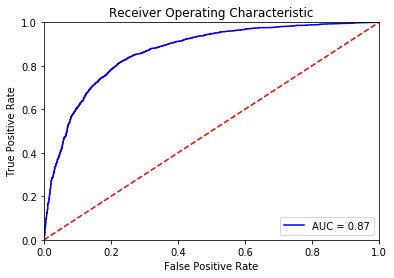

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = logit1.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)

auc = roc_auc_score(y_test, probs)
print("AUC:",auc)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Optimal_threshold:",optimal_threshold)


fpr, tpr, threshold = roc_curve(y_test, probs)
mpl.title('Receiver Operating Characteristic')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
mpl.legend(loc = 'lower right')
mpl.plot([0, 1], [0, 1],'r--')
mpl.xlim([0, 1])
mpl.ylim([0, 1])
mpl.ylabel('True Positive Rate')
mpl.xlabel('False Positive Rate')
mpl.show()


In [70]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

print(classification_report(y_test,new_predictions))

new_confusion_mat = confusion_matrix(y_test, new_predictions)
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
new_confusion_df

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2588
           1       0.78      0.82      0.80      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.80      0.79      0.79      5087
weighted avg       0.80      0.79      0.79      5087



,Predicted neg,Predicted pos
Actual neg,1995,593
Actual pos,453,2046


In [71]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logit1.coef_))], axis = 1)

In [72]:
coefficients.columns=['Variable','Coefficient']
coefficients = coefficients.sort_values('Coefficient', ascending=False)

In [73]:
coefficients.to_csv("C:\\DATASCIENCE\\11-DONO-PROJECT\\2-Jigsaw_Dono\\DATASTORE\\coefficients.csv", sep=',')

In [74]:
coefficients.head(20)

,Variable,Coefficient
84,PROPERTY STATE_PR,3.458137
92,PROPERTY STATE_VI,2.570845
53,PROPERTY STATE_FL,2.457712
89,PROPERTY STATE_TX,1.296314
42,NUMBER OF UNITS_4,0.798854
37,PROPERTY TYPE_MH,0.524699
50,PROPERTY STATE_CT,0.471222
17,"SELLER NAME_LOANDEPOT.COM, LLC",0.432441
3,ORIGINAL LOAN-TO-VALUE (LTV),0.351793
43,OCCUPANCY TYPE_P,0.313003


In [75]:
coefficients.tail(20)

,Variable,Coefficient
29,NUMBER OF BORROWERS_3,-0.383010
22,SELLER NAME_PMTT4,-0.390897
78,PROPERTY STATE_NV,-0.412835
71,PROPERTY STATE_MT,-0.415405
95,PROPERTY STATE_WI,-0.418521
27,"SELLER NAME_WELLS FARGO BANK, N.A.",-0.467728
82,PROPERTY STATE_OR,-0.477139
49,PROPERTY STATE_CO,-0.482173
85,PROPERTY STATE_RI,-0.486877
93,PROPERTY STATE_VT,-0.503190


## LOGISTIC REGRESSION WITH GRID SEARCH CV

In [76]:
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.01,0.1,1,10]}
lr = LogisticRegression()
model_lr = GridSearchCV(lr, param_grid=grid_values, cv=12)
model_lr.fit(X_train, y_train)

GridSearchCV(cv=12, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
model_lr.cv_results_['params']

[{'C': 0.01, 'penalty': 'l1'},
 {'C': 0.01, 'penalty': 'l2'},
 {'C': 0.1, 'penalty': 'l1'},
 {'C': 0.1, 'penalty': 'l2'},
 {'C': 1, 'penalty': 'l1'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 10, 'penalty': 'l1'},
 {'C': 10, 'penalty': 'l2'}]

In [78]:
model_lr.best_params_

{'C': 1, 'penalty': 'l1'}

In [79]:
lr1 = LogisticRegression(C=1,penalty='l1', verbose=5)
lr1.fit(X_train, y_train)

predictions = lr1.predict(X_test)
print(" Accuracy Score:",lr1.score(X_test, y_test))
print(classification_report(y_test,predictions))

confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

[LibLinear] Accuracy Score: 0.7922154511499901
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2588
           1       0.79      0.79      0.79      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.79      0.79      0.79      5087
weighted avg       0.79      0.79      0.79      5087



,Predicted neg,Predicted pos
Actual neg,2053,535
Actual pos,522,1977


In [80]:
probs = lr1.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)

auc = roc_auc_score(y_test, probs)
print("AUC:",auc)

AUC: 0.8661084217303614


## BAGGING CLASSIFIER ENSEMBLE WITH DECISION TREE

In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
bagged_model = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, max_samples=100, bootstrap=True, n_jobs=-1)
bagged_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=200, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [83]:
predictionsm = bagged_model.predict(X_test)
print(" Accuracy Score:",bagged_model.score(X_test, y_test))
print(classification_report(y_test,predictionsm))

confusion_mat = confusion_matrix(y_test, predictionsm)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.7741301356398663
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      2588
           1       0.75      0.82      0.78      2499

   micro avg       0.77      0.77      0.77      5087
   macro avg       0.78      0.77      0.77      5087
weighted avg       0.78      0.77      0.77      5087



,Predicted neg,Predicted pos
Actual neg,1898,690
Actual pos,459,2040


In [84]:
probs = bagged_model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)

auc = roc_auc_score(y_test, probs)
print("AUC:",auc)


AUC: 0.8541908262532215


## ADABOOST CLASSIFIER

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [86]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=100, learning_rate=0.01, random_state=123)

In [87]:
ada_model.fit(X_train, y_train)
predictionsad = ada_model.predict(X_test)
print(" Accuracy Score:",ada_model.score(X_test, y_test))
print(classification_report(y_test,predictionsad))

confusion_mat = confusion_matrix(y_test, predictionsad)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.7796343620994692
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2588
           1       0.78      0.77      0.77      2499

   micro avg       0.78      0.78      0.78      5087
   macro avg       0.78      0.78      0.78      5087
weighted avg       0.78      0.78      0.78      5087



,Predicted neg,Predicted pos
Actual neg,2050,538
Actual pos,583,1916


In [88]:
probs = ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)

auc = roc_auc_score(y_test, probs)
print("AUC:",auc)

AUC: 0.8344581263726509


## RANDOM FOREST CLASSIFIER WITH UNDERSAMPLING

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

print(" Accuracy Score:",rf_model.score(X_test, y_test))
print(classification_report(y_test,predictions))

confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.7892667584037744
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2588
           1       0.78      0.80      0.79      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.79      0.79      0.79      5087
weighted avg       0.79      0.79      0.79      5087



,Predicted neg,Predicted pos
Actual neg,2027,561
Actual pos,511,1988


AUC: 0.8661492417678044
Optimal_threshold: 0.5042609134477796


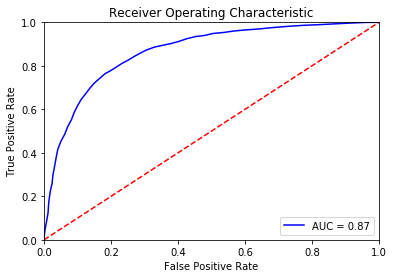

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print("AUC:",auc)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Optimal_threshold:",optimal_threshold)

fpr, tpr, threshold = roc_curve(y_test, probs)
mpl.title('Receiver Operating Characteristic')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
mpl.legend(loc = 'lower right')
mpl.plot([0, 1], [0, 1],'r--')
mpl.xlim([0, 1])
mpl.ylim([0, 1])
mpl.ylabel('True Positive Rate')
mpl.xlabel('False Positive Rate')
mpl.show()

In [91]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

print(classification_report(y_test,new_predictions))

new_confusion_mat = confusion_matrix(y_test, new_predictions)
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
new_confusion_df

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2588
           1       0.78      0.80      0.79      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.79      0.79      0.79      5087
weighted avg       0.79      0.79      0.79      5087



,Predicted neg,Predicted pos
Actual neg,2027,561
Actual pos,511,1988


In [92]:
feature_list = []
for name, score in zip(mbs_scaled_final.columns, rf_model.feature_importances_):
    feature_list.append((score, name))

In [93]:
sorted(feature_list, reverse=True)

[(0.19791954044127483, 'BORROWER CREDIT SCORE AT ORIGINATION'),
 (0.10585859178747135, 'PROPERTY STATE_DE'),
 (0.09268163295300305, 'ORIGINAL INTEREST RATE'),
 (0.08977967870862903, 'ORIGINAL UPB'),
 (0.08703968375714793, 'ORIGINAL DEBT TO INCOME RATIO'),
 (0.06849636436380764, 'ORIGINAL LOAN-TO-VALUE (LTV)'),
 (0.025390899997634574, 'SELLER NAME_WELLS FARGO BANK, N.A.'),
 (0.022656255732199104, 'PROPERTY STATE_TN'),
 (0.014905584457168115, 'ORIGINAL LOAN TERM'),
 (0.013040638878407071, 'SELLER NAME_NATIONSTAR MORTGAGE, LLC'),
 (0.012664929979574026, 'PROPERTY TYPE_PU'),
 (0.011967784020311113, 'DEFAULT STATUS'),
 (0.011884084636660028, 'FIRST TIME HOME BUYER INDICATOR_Y'),
 (0.011834047214639527, 'PROPERTY TYPE_MH'),
 (0.011621486076324508, 'ORIGINATION CHANNEL_C'),
 (0.01118020866672431, 'NUMBER OF BORROWERS_6'),
 (0.01029191531082222, 'PROPERTY STATE_PA'),
 (0.010152706044637949,
  'SELLER NAME_UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE'),
 (0.0095709865678

### RUNNING THE RF MODEL AGAIN WITH THE TOP 30 IMPORTANT FEATURES

In [94]:
undersample_data1=undersample_data[['BORROWER CREDIT SCORE AT ORIGINATION', 'PROPERTY STATE_DE','ORIGINAL INTEREST RATE','ORIGINAL UPB', 'ORIGINAL DEBT TO INCOME RATIO', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'SELLER NAME_WELLS FARGO BANK, N.A.', 'PROPERTY STATE_TN', 'ORIGINAL LOAN TERM','SELLER NAME_NATIONSTAR MORTGAGE, LLC', 'PROPERTY TYPE_PU', 'ORIGINATION CHANNEL_C', 'FIRST TIME HOME BUYER INDICATOR_Y', 'PROPERTY TYPE_MH', 'NUMBER OF BORROWERS_6', 'PROPERTY STATE_PA', 'SELLER NAME_UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE', 'PROPERTY STATE_AZ', 'SELLER NAME_PMTT4', 'LOAN PURPOSE_P', 'NUMBER OF UNITS_4', 'PROPERTY STATE_ID', 'SELLER NAME_GUILD MORTGAGE COMPANY', 'PROPERTY STATE_MT', 'PROPERTY STATE_CA', 'PROPERTY STATE_AR', 'PROPERTY STATE_VT', 'PROPERTY STATE_FL', 'PROPERTY STATE_NV', 'PROPERTY STATE_OR','DEFAULT STATUS']]

In [95]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(undersample_data1.drop("DEFAULT STATUS", axis=1),
                                                    undersample_data["DEFAULT STATUS"], test_size = 0.2,\
                                                    random_state=115)

In [96]:
rf_model1 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rf_model1.fit(X_train1, y_train1)
predictions1 = rf_model1.predict(X_test1)

print(" Accuracy Score:",rf_model1.score(X_test1, y_test1))
print(classification_report(y_test1,predictions1))

confusion_mat = confusion_matrix(y_test1, predictions1)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.7647405660377359
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1704
           1       0.77      0.75      0.76      1688

   micro avg       0.76      0.76      0.76      3392
   macro avg       0.76      0.76      0.76      3392
weighted avg       0.76      0.76      0.76      3392



,Predicted neg,Predicted pos
Actual neg,1321,383
Actual pos,415,1273


## LOGISTIC REGRESSION WITH TOP 30 IMPORTANT FEATURES 

In [97]:
logit11 = LogisticRegression()
logit11.fit(X_train1, y_train1)
predictions11 = logit11.predict(X_test1)
print(" Accuracy Score:",logit11.score(X_test1, y_test1))
print(classification_report(y_test1,predictions11))

confusion_mat = confusion_matrix(y_test1, predictions11)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.7609080188679245
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1704
           1       0.77      0.75      0.76      1688

   micro avg       0.76      0.76      0.76      3392
   macro avg       0.76      0.76      0.76      3392
weighted avg       0.76      0.76      0.76      3392



,Predicted neg,Predicted pos
Actual neg,1318,386
Actual pos,425,1263


# SVM WITH UNDERSAMPLING

In [98]:
# Sigmoid Kernel

from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  
predictions = svclassifier.predict(X_test)  
print(" Accuracy Score:",svclassifier.score(X_test, y_test))
print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions))  

 Accuracy Score: 0.7861214861411441
[[1996  592]
 [ 496 2003]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2588
           1       0.77      0.80      0.79      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.79      0.79      0.79      5087
weighted avg       0.79      0.79      0.79      5087



In [99]:
# Gaussian Kernel

svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  
predictions = svclassifier.predict(X_test)  
print(" Accuracy Score:",svclassifier.score(X_test, y_test))
print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions))  

 Accuracy Score: 0.7947709848633773
[[2062  526]
 [ 518 1981]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2588
           1       0.79      0.79      0.79      2499

   micro avg       0.79      0.79      0.79      5087
   macro avg       0.79      0.79      0.79      5087
weighted avg       0.79      0.79      0.79      5087



# OVERSAMPLING

In [100]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mbs_scaled_final.drop("DEFAULT STATUS", axis=1),
                                                    mbs_scaled_final[["DEFAULT STATUS"]], test_size = 0.2,\
                                                    random_state=112)

In [101]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1445673, 98)
Number transactions y_train dataset:  (1445673, 1)
Number transactions X_test dataset:  (361419, 98)
Number transactions y_test dataset:  (361419, 1)


In [102]:
print("Before OverSampling, counts of label '1': {}".format(y_train[y_train['DEFAULT STATUS']==1].count()))
print("Before OverSampling, counts of label '0': {} \n".format(y_train[y_train['DEFAULT STATUS']==0].count()))

Before OverSampling, counts of label '1': DEFAULT STATUS    6750
dtype: int64
Before OverSampling, counts of label '0': DEFAULT STATUS    1438923
dtype: int64 



In [103]:
smt = SMOTE(random_state=2)
X_train_res, y_train_res = smt.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (2877846, 98)
After OverSampling, the shape of train_y: (2877846,) 



In [104]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 1438923
After OverSampling, counts of label '0': 1438923


## LOGISTIC REGRESSION WITH OVERSAMPLING

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import classification_report


logit1 = LogisticRegression()
logit1.fit(X_train_res, y_train_res)
predictions = logit1.predict(X_test)
print(" Accuracy Score:",logit1.score(X_test, y_test))
print(classification_report(y_test,predictions))

confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.8174196707976061
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    359691
           1       0.02      0.76      0.04      1728

   micro avg       0.82      0.82      0.82    361419
   macro avg       0.51      0.79      0.47    361419
weighted avg       0.99      0.82      0.90    361419



,Predicted neg,Predicted pos
Actual neg,294113,65578
Actual pos,410,1318


AUC: 0.8671226753580773
Optimal_threshold: 0.41908678909955893


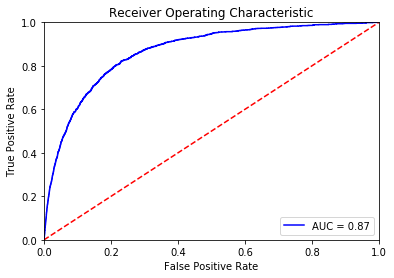

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = logit1.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)

auc = roc_auc_score(y_test, probs)
print("AUC:",auc)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Optimal_threshold:",optimal_threshold)


fpr, tpr, threshold = roc_curve(y_test, probs)
mpl.title('Receiver Operating Characteristic')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
mpl.legend(loc = 'lower right')
mpl.plot([0, 1], [0, 1],'r--')
mpl.xlim([0, 1])
mpl.ylim([0, 1])
mpl.ylabel('True Positive Rate')
mpl.xlabel('False Positive Rate')
mpl.show()


In [107]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

print(classification_report(y_test,new_predictions))

new_confusion_mat = confusion_matrix(y_test, new_predictions)
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
new_confusion_df

              precision    recall  f1-score   support

           0       1.00      0.77      0.87    359691
           1       0.02      0.82      0.03      1728

   micro avg       0.77      0.77      0.77    361419
   macro avg       0.51      0.80      0.45    361419
weighted avg       0.99      0.77      0.87    361419



,Predicted neg,Predicted pos
Actual neg,276779,82912
Actual pos,309,1419


## RANDOM FOREST WITH OVER SAMPLING

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
predictions = rf_model.predict(X_test)

print(" Accuracy Score:",rf_model.score(X_test, y_test))
print(classification_report(y_test,predictions))

confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

 Accuracy Score: 0.9943002443147704
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    359691
           1       0.08      0.02      0.03      1728

   micro avg       0.99      0.99      0.99    361419
   macro avg       0.54      0.51      0.51    361419
weighted avg       0.99      0.99      0.99    361419



,Predicted neg,Predicted pos
Actual neg,359326,365
Actual pos,1695,33


AUC: 0.8021947410081514
Optimal_threshold: 0.41908678909955893


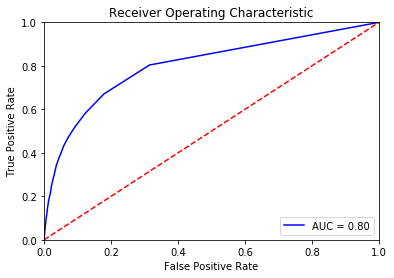

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print("AUC:",auc)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Optimal_threshold:",optimal_threshold)

fpr, tpr, threshold = roc_curve(y_test, probs)
mpl.title('Receiver Operating Characteristic')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
mpl.legend(loc = 'lower right')
mpl.plot([0, 1], [0, 1],'r--')
mpl.xlim([0, 1])
mpl.ylim([0, 1])
mpl.ylabel('True Positive Rate')
mpl.xlabel('False Positive Rate')
mpl.show()

In [110]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

print(classification_report(y_test,new_predictions))

new_confusion_mat = confusion_matrix(y_test, new_predictions)
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
new_confusion_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    359691
           1       0.08      0.04      0.05      1728

   micro avg       0.99      0.99      0.99    361419
   macro avg       0.54      0.52      0.52    361419
weighted avg       0.99      0.99      0.99    361419



,Predicted neg,Predicted pos
Actual neg,358982,709
Actual pos,1666,62


In [111]:
feature_list = []
for name, score in zip(mbs_scaled_final.columns, rf_model.feature_importances_):
    feature_list.append((score, name))
    
sorted(feature_list, reverse=True)

[(0.16998866406750252, 'PROPERTY STATE_DE'),
 (0.12511708455233536, 'BORROWER CREDIT SCORE AT ORIGINATION'),
 (0.11840913082050228, 'ORIGINAL INTEREST RATE'),
 (0.062401681325685535, 'ORIGINAL DEBT TO INCOME RATIO'),
 (0.060368105542040223, 'SELLER NAME_WELLS FARGO BANK, N.A.'),
 (0.059264342310091755, 'ORIGINAL LOAN-TO-VALUE (LTV)'),
 (0.03968772097176007, 'ORIGINAL UPB'),
 (0.0375112296211388, 'PROPERTY STATE_TN'),
 (0.01693704411755427, 'NUMBER OF BORROWERS_6'),
 (0.016862755034393967, 'SELLER NAME_NATIONSTAR MORTGAGE, LLC'),
 (0.016315295827091045, 'LOAN PURPOSE_P'),
 (0.016251495798382608, 'NUMBER OF UNITS_4'),
 (0.015834807813672677, 'PROPERTY STATE_PA'),
 (0.015614844790268725, 'PROPERTY TYPE_PU'),
 (0.01560593278388409, 'PROPERTY STATE_AZ'),
 (0.014076264357243485, 'FIRST TIME HOME BUYER INDICATOR_Y'),
 (0.011920000243293332, 'PROPERTY TYPE_MH'),
 (0.011232404114782789, 'ORIGINATION CHANNEL_C'),
 (0.011171560367152979, 'SELLER NAME_PMTT4'),
 (0.011143455703380524, 'ORIGINAL LOA

### Undersampled data:

BORROWER CREDIT SCORE AT ORIGINATION, ORIGINAL INTEREST RATE, ORIGINAL UPB, ORIGINAL DEBT TO INCOME RATIO, ORIGINAL LOAN-TO-VALUE (LTV) and STATE seemed to be more significant predictors as per Random Forest classifier.

The predictions by Logistic regression were marginally better compared to other models. 
Accuracy: 79 % of the borrowers have been correctly predicted by the model. 
Precision : 76% predicted as Defaulters are actually defaulters.
Recall:  81% of the defaulters have actually been predicted as defaulters.
Also AUC of  86% and f1 score of  79% indicate that the models prediction capability is good and balanced.


### Oversampled data:

BORROWER CREDIT SCORE AT ORIGINATION, ORIGINAL INTEREST RATE, ORIGINAL UPB, ORIGINAL DEBT TO INCOME RATIO, ORIGINAL LOAN-TO-VALUE (LTV) and STATE seemed to be more significant predictors as per Random Forest classifier.

Though the prediction accuracy has increased for both models Logistic Regression and Random Forest, the precision and recall has reduced considerably. That is the model is capturing only the majority class and not able to predict the minority class which is defaulters. Hence these models cannot be used.


